## Importing the necessary libraries

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import librosa
from matplotlib import pyplot as plt
import IPython.display as ipd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the Cat sound .wav files and extracting features

In [3]:
chroma_stft = []
rms = []
spec_cent = []
spec_bw = []
rolloff = []
zcr = []
mfcc = []
mel = []
file_names = []
contrast = []
for i in range(1, 168):
    cat_fname = 'full_dataset/cat_' + str(i) + '.wav'
    try:
        cat_data, cat_rate = librosa.load(cat_fname)
        stft = librosa.stft(y = cat_data)
        chroma_stft.append(librosa.feature.chroma_stft(y = cat_data, sr = cat_rate).flatten().mean())
        rms.append(librosa.feature.rms(y = cat_data).flatten().mean())
        spec_cent.append(librosa.feature.spectral_centroid(y = cat_data, sr = cat_rate).flatten().mean())
        mel.append(librosa.feature.melspectrogram(y = cat_data, sr = cat_rate).flatten().mean())
        contrast.append(librosa.feature.spectral_contrast(S = stft, sr = cat_rate).flatten().mean())
        spec_bw.append(librosa.feature.spectral_bandwidth(y = cat_data, sr = cat_rate).flatten().mean())
        rolloff.append(librosa.feature.spectral_rolloff(y = cat_data, sr = cat_rate).flatten().mean())
        zcr.append(librosa.feature.zero_crossing_rate(y = cat_data).flatten().mean())
        mfcc.append(librosa.feature.mfcc(y = cat_data, sr = cat_rate).flatten().mean())
        file_names.append(cat_fname)
    except:
         print(cat_fname , ": Not available")       

full_dataset/cat_104.wav : Not available
full_dataset/cat_111.wav : Not available
full_dataset/cat_145.wav : Not available


## Reading the Dog sound .wav files and extracting features

In [4]:
for i in range(0, 113):
    dog_fname = 'full_dataset/dog_barking_' + str(i) + '.wav'
    try:
        dog_data, dog_rate = librosa.load(dog_fname)
        stft = librosa.stft(y = dog_data)
        chroma_stft.append(librosa.feature.chroma_stft(y = dog_data, sr = dog_rate).flatten().mean())
        rms.append(librosa.feature.rms(y = dog_data).flatten().mean())
        spec_cent.append(librosa.feature.spectral_centroid(y = dog_data, sr = dog_rate).flatten().mean())
        mel.append(librosa.feature.melspectrogram(y = dog_data, sr = dog_rate).flatten().mean())
        contrast.append(librosa.feature.spectral_contrast(S = stft, sr = dog_rate).flatten().mean())
        spec_bw.append(librosa.feature.spectral_bandwidth(y = dog_data, sr = dog_rate).flatten().mean())
        rolloff.append(librosa.feature.spectral_rolloff(y = dog_data, sr = dog_rate).flatten().mean())
        zcr.append(librosa.feature.zero_crossing_rate(y = dog_data).flatten().mean())
        mfcc.append(librosa.feature.mfcc(y = dog_data, sr = dog_rate).flatten().mean())
        file_names.append(dog_fname)
    except:
         print(dog_data , ": Not available")       

## Defining the label column

In [5]:
y_cat = np.zeros((164, 1)) 
y_dog = np.ones((113, 1))
y = np.concatenate((y_cat, y_dog))
print(y.shape)

(277, 1)


In [6]:
len(chroma_stft)

277

## Creating dataset from extracted features

In [7]:
data = {'chroma_stft': chroma_stft, 
     'rmse': rms, 
     'spectral_centroid': spec_cent,
    'melspectrogram ':mel,
     'spectral_bandwidth': spec_bw, 
        'contrast':contrast,
     'rolloff': rolloff, 
     'zero_crossing_rate': zcr,
     'Mel-frequency cepstrum': mfcc,
       'target': list(y.flatten())}
df = pd.DataFrame(data = data)

In [8]:
df.shape

(277, 10)

In [9]:
df.head()

,chroma_stft,rmse,spectral_centroid,melspectrogram,spectral_bandwidth,contrast,rolloff,zero_crossing_rate,Mel-frequency cepstrum,target
0,0.490268,0.028362,1532.445983,0.481985,1642.505643,96.525186,3179.825493,0.077072,-9.425269,0.0
1,0.472435,0.028300,1493.934633,0.433690,1605.264305,96.408007,3099.615042,0.074552,-9.472152,0.0
2,0.510826,0.019658,1470.220566,0.301474,1596.569381,95.270712,3063.803101,0.075473,-10.130361,0.0
3,0.342910,0.138247,1696.083328,5.805471,1536.445913,101.104095,3277.968750,0.095989,-6.521348,0.0
4,0.649715,0.028982,1815.174593,0.384663,1881.040583,95.036439,3932.933343,0.083587,-6.667983,0.0


In [10]:
df.describe()

,chroma_stft,rmse,spectral_centroid,melspectrogram,spectral_bandwidth,contrast,rolloff,zero_crossing_rate,Mel-frequency cepstrum,target
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.386156,0.090292,1468.631093,3.533779,1368.168054,98.015813,2708.229835,0.086157,-11.094259,0.407942
std,0.145159,0.058995,537.510134,4.041943,425.440689,4.850197,1150.501019,0.042160,6.323117,0.492342
min,0.109959,0.006250,288.851451,0.010949,506.849801,70.777846,300.421829,0.006267,-27.712376,0.000000
25%,0.255138,0.045603,1012.587492,0.906043,963.241386,95.549349,1611.075107,0.059361,-16.219231,0.000000
50%,0.380791,0.083274,1416.869795,2.402816,1434.106709,98.730117,2582.321885,0.074130,-11.182182,0.000000
75%,0.498127,0.121574,1795.227864,4.520168,1711.982247,100.980207,3619.068239,0.104274,-5.623000,1.000000
max,0.746636,0.299168,3438.614128,22.393885,2171.148015,107.838638,5996.372223,0.256877,5.372027,1.000000


<AxesSubplot:>

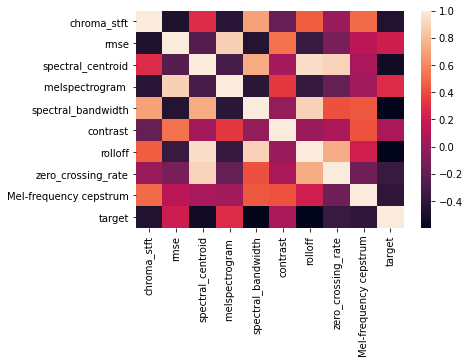

In [11]:
sns.heatmap(df.corr())

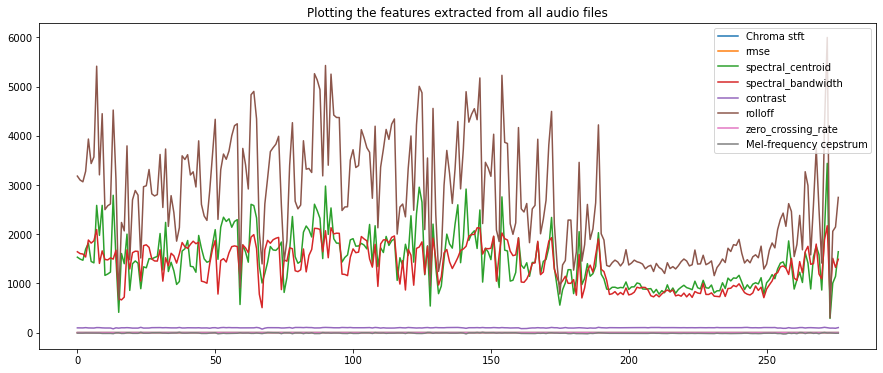

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df['chroma_stft'], label = "Chroma stft")
plt.plot(df['rmse'], label = "rmse")
plt.plot(df['spectral_centroid'], label = "spectral_centroid")
# plt.plot(df['melspectrogram'], label = "melspectrogram")
plt.plot(df['spectral_bandwidth'], label = "spectral_bandwidth")
plt.plot(df['contrast'], label = "contrast")
plt.plot(df['rolloff'], label = "rolloff")
plt.plot(df['zero_crossing_rate'], label = "zero_crossing_rate")
plt.plot(df['Mel-frequency cepstrum'], label = "Mel-frequency cepstrum")
plt.legend()
plt.title("Plotting the features extracted from all audio files")
plt.show()

## Plotting random cat .wav files

120


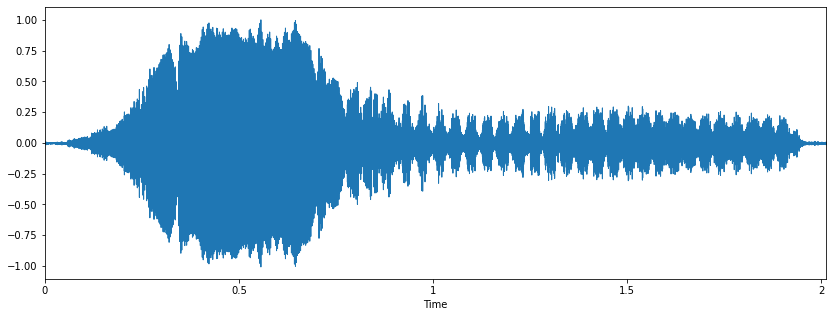

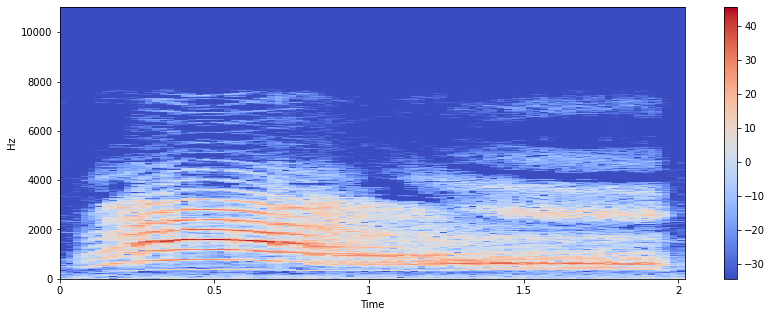

In [13]:
import random
from IPython.display import Audio 
from IPython.core.display import display
import librosa.display

#choose a random .wav file
n = random.randint(0,168)
print(n)
if(n == 104 | n == 111 | n == 145):
    audio_path = "full_dataset/cat_1.wav"
else:
    audio_path = "full_dataset/cat_" + str(n) + ".wav"
    
#play the audio track
x , sr = librosa.load(audio_path)
display(Audio(audio_path))

#plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

## Plotting random dog .wav files

61


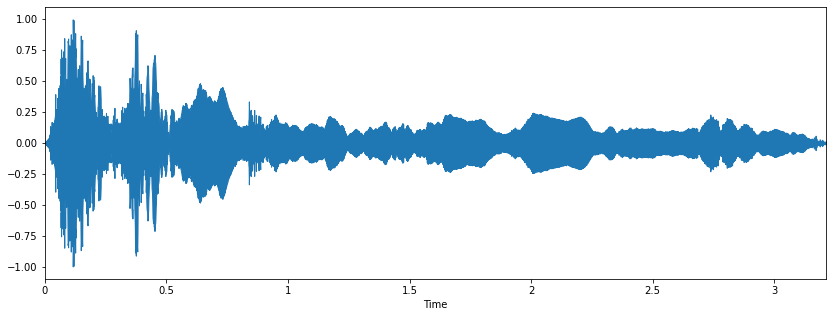

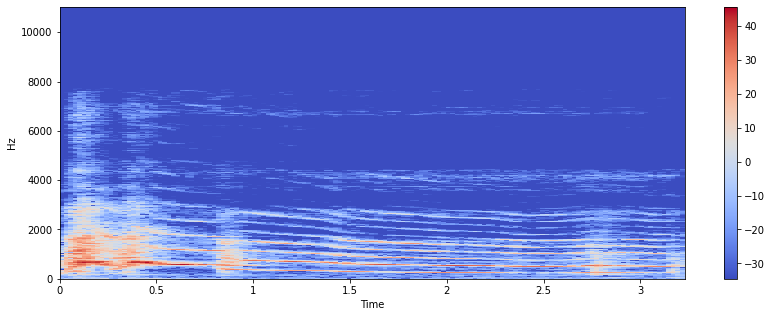

In [14]:
import random
from IPython.display import Audio 
from IPython.core.display import display

#choose a random .wav file
n = random.randint(0,113)
print(n)
audio_path = "full_dataset/dog_barking_" + str(n) + ".wav"
x , sr = librosa.load(audio_path)
    
#play the audio track
x , sr = librosa.load(audio_path)
display(Audio(audio_path))

#plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

## Preparing the data to apply models

### 1. Applying SMOTE (synthetic minority oversampling technique)

In [15]:
df.shape
df.head()

,chroma_stft,rmse,spectral_centroid,melspectrogram,spectral_bandwidth,contrast,rolloff,zero_crossing_rate,Mel-frequency cepstrum,target
0,0.490268,0.028362,1532.445983,0.481985,1642.505643,96.525186,3179.825493,0.077072,-9.425269,0.0
1,0.472435,0.028300,1493.934633,0.433690,1605.264305,96.408007,3099.615042,0.074552,-9.472152,0.0
2,0.510826,0.019658,1470.220566,0.301474,1596.569381,95.270712,3063.803101,0.075473,-10.130361,0.0
3,0.342910,0.138247,1696.083328,5.805471,1536.445913,101.104095,3277.968750,0.095989,-6.521348,0.0
4,0.649715,0.028982,1815.174593,0.384663,1881.040583,95.036439,3932.933343,0.083587,-6.667983,0.0


In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=100)
df, y = sm.fit_resample(df, y)
df = pd.DataFrame(data = df)
df.head()

,chroma_stft,rmse,spectral_centroid,melspectrogram,spectral_bandwidth,contrast,rolloff,zero_crossing_rate,Mel-frequency cepstrum,target
0,0.490268,0.028362,1532.445983,0.481985,1642.505643,96.525186,3179.825493,0.077072,-9.425269,0.0
1,0.472435,0.028300,1493.934633,0.433690,1605.264305,96.408007,3099.615042,0.074552,-9.472152,0.0
2,0.510826,0.019658,1470.220566,0.301474,1596.569381,95.270712,3063.803101,0.075473,-10.130361,0.0
3,0.342910,0.138247,1696.083328,5.805471,1536.445913,101.104095,3277.968750,0.095989,-6.521348,0.0
4,0.649715,0.028982,1815.174593,0.384663,1881.040583,95.036439,3932.933343,0.083587,-6.667983,0.0


In [17]:
df.shape

(328, 10)

### 2. Splitting dataset into training and testing datasets

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 3. Normalisation of dataset

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))
df_x = pd.DataFrame(data = X)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(262, 9)
(66, 9)
262
66


## Applying ML models for classification

In [21]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [22]:
accuracy = []
f1_scores = []
model_name = []

### 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression()
log.fit(X_train,y_train)
log_pred = log.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, log_pred)) 
print(" f1_score = ", f1_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

accuracy.append(accuracy_score(y_test, log_pred))
f1_scores.append(f1_score(y_test, log_pred))               
model_name.append("Logistic_Regression")

 accuracy =  0.8333333333333334
 f1_score =  0.8358208955223881
[[27  7]
 [ 4 28]]
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83        34
         1.0       0.80      0.88      0.84        32

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66



### 2. Naive Bayes

In [24]:
from sklearn import naive_bayes

classifier = naive_bayes.GaussianNB()
nb_model = classifier.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, nb_pred)) 
print(" f1_score = ", f1_score(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

accuracy.append(accuracy_score(y_test, nb_pred))
f1_scores.append(f1_score(y_test, nb_pred)) 
model_name.append("Naive_Bayes")

 accuracy =  0.7878787878787878
 f1_score =  0.78125
[[27  7]
 [ 7 25]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        34
         1.0       0.78      0.78      0.78        32

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



### 3. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
rf_model = classifier.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, rf_pred))
print(" f1_score = ", f1_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

accuracy.append(accuracy_score(y_test, rf_pred))
f1_scores.append(f1_score(y_test, rf_pred))  
model_name.append("Random Forest Classfier")

 accuracy =  0.9090909090909091
 f1_score =  0.8999999999999999
[[33  1]
 [ 5 27]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92        34
         1.0       0.96      0.84      0.90        32

    accuracy                           0.91        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



### 4. Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

classifier = gbc()
gbc_model = classifier.fit(X_train, y_train)
prediction = gbc_model.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, prediction))
print(" f1_score = ", f1_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test,prediction))

accuracy.append(accuracy_score(y_test, prediction))
f1_scores.append(f1_score(y_test, prediction))  
model_name.append("Gradient_Boosting")

 accuracy =  0.8939393939393939
 f1_score =  0.8852459016393444
[[32  2]
 [ 5 27]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        34
         1.0       0.93      0.84      0.89        32

    accuracy                           0.89        66
   macro avg       0.90      0.89      0.89        66
weighted avg       0.90      0.89      0.89        66



### 5. XG Boost

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, xgb_pred))
print(" f1_score = ", f1_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

accuracy.append(accuracy_score(y_test, xgb_pred))
f1_scores.append(f1_score(y_test, xgb_pred))  
model_name.append("XG_Boost")

 accuracy =  0.9393939393939394
 f1_score =  0.9354838709677419
[[33  1]
 [ 3 29]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        34
         1.0       0.97      0.91      0.94        32

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66



### 6. Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dt_pred = dtree.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, dt_pred))
print(" f1_score = ", f1_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

accuracy.append(accuracy_score(y_test, dt_pred))
f1_scores.append(f1_score(y_test, dt_pred))  
model_name.append("Decision_Trees")

 accuracy =  0.8181818181818182
 f1_score =  0.8064516129032259
[[29  5]
 [ 7 25]]
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        34
         1.0       0.83      0.78      0.81        32

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



###  7. Support Vector Machines

In [29]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, svm_pred))
print(" f1_score = ", f1_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

accuracy.append(accuracy_score(y_test, svm_pred))
f1_scores.append(f1_score(y_test, svm_pred))  
model_name.append("Support_Vector_Machines")

 accuracy =  0.7878787878787878
 f1_score =  0.7741935483870969
[[28  6]
 [ 8 24]]
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        34
         1.0       0.80      0.75      0.77        32

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



### 8. K Nearest Neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,20):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

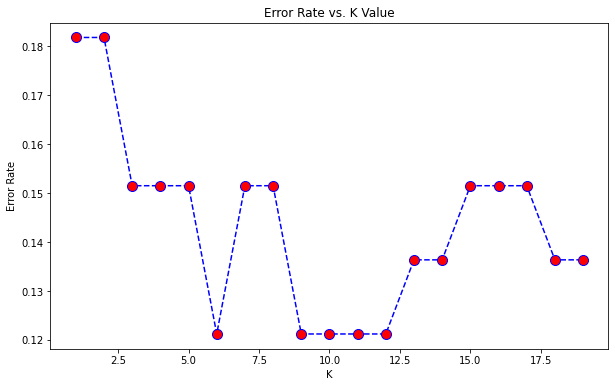

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, knn_pred))
print(" f1_score = ", f1_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

accuracy.append(accuracy_score(y_test, knn_pred))
f1_scores.append(f1_score(y_test, knn_pred))  
model_name.append("K_Nearest_Neighbours")

 accuracy =  0.8787878787878788
 f1_score =  0.8666666666666666
[[32  2]
 [ 6 26]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        34
         1.0       0.93      0.81      0.87        32

    accuracy                           0.88        66
   macro avg       0.89      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



### 9. Light gbm

In [33]:
import lightgbm as lgb

lightgbm_model = lgb.LGBMClassifier(objective = 'binary')
lightgbm_model.fit(X_train, y_train)
light_pred = lightgbm_model.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, light_pred))
print(" f1_score = ", f1_score(y_test, light_pred))
print(confusion_matrix(y_test, light_pred))
print(classification_report(y_test, light_pred))

accuracy.append(accuracy_score(y_test, light_pred))
f1_scores.append(f1_score(y_test, light_pred))  
model_name.append("Light_GBM")

 accuracy =  0.9242424242424242
 f1_score =  0.9206349206349206
[[32  2]
 [ 3 29]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93        34
         1.0       0.94      0.91      0.92        32

    accuracy                           0.92        66
   macro avg       0.92      0.92      0.92        66
weighted avg       0.92      0.92      0.92        66



###  10. Artificial Sequential Neural Network

In [34]:
import keras

In [35]:
from keras import models
from keras import layers
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
y_train = np.array(y_train)

In [38]:
history = model.fit(X_train,
                    y_train,
                    validation_split = 0.2,
                    epochs=50,
                    batch_size=64)

Epoch 1/50
4/4 [==============================] - 0s 48ms/step - loss: 154.9616 - acc: 0.2536 - val_loss: 2.7120 - val_acc: 0.7547
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 62.7228 - acc: 0.5024 - val_loss: 58.2057 - val_acc: 0.5094
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 44.1200 - acc: 0.5359 - val_loss: 4.8001 - val_acc: 0.7547
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 34.0450 - acc: 0.5598 - val_loss: 19.3594 - val_acc: 0.5472
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 35.7104 - acc: 0.5502 - val_loss: 15.5042 - val_acc: 0.6038
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 25.9359 - acc: 0.6172 - val_loss: 3.8759 - val_acc: 0.8491
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 20.3421 - acc: 0.6124 - val_loss: 5.1316 - val_acc: 0.8302
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 19.3803 - acc: 0.6507 

In [39]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

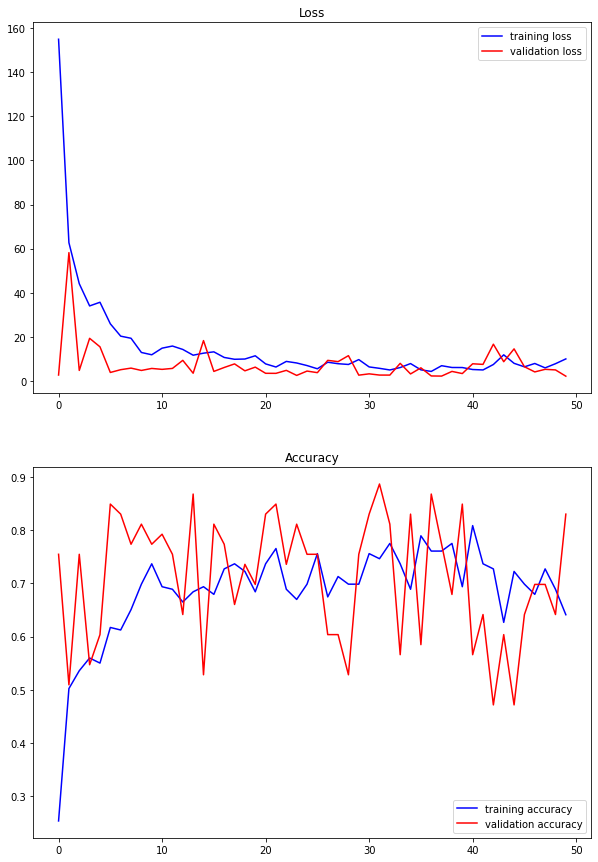

In [40]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(len(acc))

fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(epochs, loss, 'b', label='training loss')
ax1.plot(epochs, val_loss, 'r', label='validation loss')
plt.title("Loss")
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(epochs, acc, 'b', label='training accuracy')
ax2.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title("Accuracy")
ax2.legend()

plt.show()

In [41]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

3/3 [==============================] - 0s 1ms/step - loss: 2.8459 - acc: 0.8030
test_acc:  0.8030303120613098


In [42]:
accuracy.append(test_acc)
f1_scores.append(f1_score(y_test, prediction))  
model_name.append("Artificial_Neural_Network")

## Comparing Accuracies

In [43]:
data = {'models': model_name, 'Accuracy': accuracy, 'F1_score': f1_scores}
metrics_df = pd.DataFrame(data = data)

In [44]:
metrics_df

,models,Accuracy,F1_score
0,Logistic_Regression,0.833333,0.835821
1,Naive_Bayes,0.787879,0.781250
2,Random Forest Classfier,0.909091,0.900000
3,Gradient_Boosting,0.893939,0.885246
4,XG_Boost,0.939394,0.935484
5,Decision_Trees,0.818182,0.806452
6,Support_Vector_Machines,0.787879,0.774194
7,K_Nearest_Neighbours,0.878788,0.866667
8,Light_GBM,0.924242,0.920635
9,Artificial_Neural_Network,0.803030,0.885246


Text(0.5, 1.0, 'Comparing accuracies and f1 scores of all models')

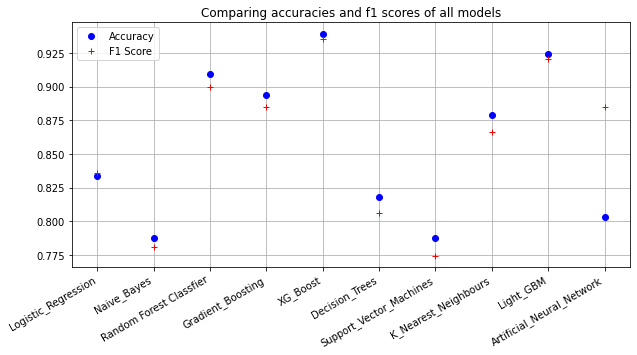

In [45]:
fig = plt.figure(figsize=(10, 5))
plt.plot(model_name, metrics_df['Accuracy'], 'bo', label='Accuracy')
plt.plot(metrics_df['F1_score'], 'r+', label='F1 Score')
plt.legend()
plt.grid()
fig.autofmt_xdate()
plt.title('Comparing accuracies and f1 scores of all models')

We see that XG Boost and Light GBM show the best results, with accuracy reaching 93%

## Analysing the misclassified examples

In [46]:
misclassified_light = X_test[y_test != light_pred]

In [47]:
misclassified_light

,chroma_stft,rmse,spectral_centroid,melspectrogram,spectral_bandwidth,contrast,rolloff,zero_crossing_rate,Mel-frequency cepstrum
110,0.426984,0.095940,1722.169561,5.926567,1801.449704,92.115981,3363.003340,0.090097,-9.332623
266,0.582154,0.088645,886.115590,3.665411,1388.327112,100.866856,1579.254280,0.039707,-1.415736
33,0.360936,0.096682,1240.897322,5.651017,1356.577802,97.758663,2158.146720,0.073910,-13.885184
167,0.390857,0.079593,1835.867117,3.520909,1855.883850,100.494625,3929.003906,0.086506,-11.182760
172,0.430558,0.143801,2340.088214,7.543391,1929.311246,105.022953,4493.832675,0.143865,-3.850798


In [48]:
misclassified_xgb = X_test[y_test != xgb_pred]

In [49]:
misclassified_xgb

,chroma_stft,rmse,spectral_centroid,melspectrogram,spectral_bandwidth,contrast,rolloff,zero_crossing_rate,Mel-frequency cepstrum
266,0.582154,0.088645,886.115590,3.665411,1388.327112,100.866856,1579.254280,0.039707,-1.415736
33,0.360936,0.096682,1240.897322,5.651017,1356.577802,97.758663,2158.146720,0.073910,-13.885184
167,0.390857,0.079593,1835.867117,3.520909,1855.883850,100.494625,3929.003906,0.086506,-11.182760
172,0.430558,0.143801,2340.088214,7.543391,1929.311246,105.022953,4493.832675,0.143865,-3.850798


In [50]:
import IPython.display as ipd
# [266, 33, 167, 172, 110]:

audio_path = file_names[266]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
ipd.Audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>


In [51]:
audio_path = file_names[33]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
ipd.Audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>


In [52]:
audio_path = file_names[167]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
ipd.Audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>


In [53]:
audio_path = file_names[172]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
ipd.Audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>


In [54]:
audio_path = file_names[110]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
ipd.Audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>


Four of them are common: 266, 33, 167, 172